# DANIEL KARUME
# SCT211-0072/2022
# HEAT EQUATION SIMULATION
# LAB-08

## <u>INTRODUCTION</u>


In the realm of mathematical modeling and computational science, the heat equation stands as a fundamental pillar governing the behavior of heat distribution in various physical systems. Understanding and simulating the heat equation is crucial across diverse fields, including physics, engineering, environmental science, and more.

Through the lens of computational methods, particularly using Python, we embark on a journey to explore the intricacies of the heat equation and its implications.

This assignment delves into the principles of numerical methods applied to the heat equation, providing a hands-on approach to comprehend its theoretical underpinnings and practical applications.

Leveraging the power of Python, a versatile and widely-used programming language in scientific computing, we delve into the process of simulating heat diffusion, exploring phenomena such as steady-state solutions, transient behavior, and boundary value problems.

By engaging in this exploration, students will gain insights into the dynamics of heat transfer processes and develop proficiency in utilizing computational tools to analyze and solve complex physical problems.

Through a combination of theoretical concepts, coding exercises, and real-world examples, this assignment aims to empower students with the skills and knowledge necessary to tackle challenges in heat transfer modeling and beyond.




## <u>IMPLEMENTATION</u>
The implementation of the heat equation simulation in Python involves leveraging the language's rich ecosystem of scientific libraries and numerical computation tools. By utilizing libraries such as NumPy for efficient array manipulation, Matplotlib for data visualization, and possibly SciPy for advanced mathematical functions, I was able to construct a robust and accurate simulation framework.

The program would typically involve discretizing the heat equation using finite difference methods, defining initial and boundary conditions, and iteratively solving the resulting system of equations to simulate heat diffusion over time. Through careful coding and experimentation, students can fine-tune parameters, explore different scenarios, and visualize the evolution of temperature distributions in various systems.

Additionally, encapsulating the simulation logic into reusable functions or classes promotes modularity and scalability, facilitating further exploration and extension of the simulation capabilities.

Overall, the Python program serves as a versatile and accessible platform for exploring the intricacies of the heat equation and gaining insights into heat transfer phenomena.

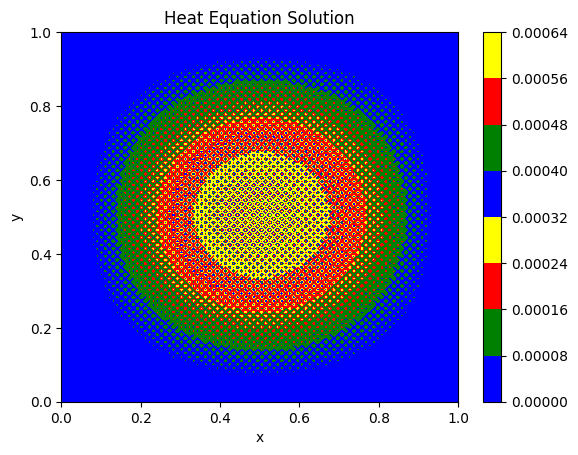

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def solve_heat_equation(length_x, length_y, num_points_x, num_points_y, time_steps, alpha):
    """
    Solve the 2D heat equation using an explicit finite difference method.

    Parameters:
    - length_x (float): Length of the domain in the x-direction.
    - length_y (float): Length of the domain in the y-direction.
    - num_points_x (int): Number of grid points in the x-direction.
    - num_points_y (int): Number of grid points in the y-direction.
    - time_steps (int): Number of time steps.
    - alpha (float): Thermal diffusivity.

    Returns:
    - u (ndarray): Final solution of the heat equation.
    """
    # Grid spacing
    dx = length_x / (num_points_x - 1)
    dy = length_y / (num_points_y - 1)
    dt = min(dx**2, dy**2) / (4 * alpha)

    # Initial condition
    u = np.zeros((num_points_x, num_points_y))
    u[int(num_points_x/2), int(num_points_y/2)] = 1.0

    # Solve the heat equation
    for _ in range(time_steps):
        u[1:-1, 1:-1] += alpha * dt * (
            (u[:-2, 1:-1] - 2 * u[1:-1, 1:-1] + u[2:, 1:-1]) / dx**2 +
            (u[1:-1, :-2] - 2 * u[1:-1, 1:-1] + u[1:-1, 2:]) / dy**2
        )

    return u

def plot_heat_equation_solution(u, length_x, length_y):
    """
    Plot the solution of the 2D heat equation.

    Parameters:
    - u (ndarray): Solution of the heat equation.
    - length_x (float): Length of the domain in the x-direction.
    - length_y (float): Length of the domain in the y-direction.
    """
    # Create grid
    x = np.linspace(0, length_x, u.shape[0])
    y = np.linspace(0, length_y, u.shape[1])
    X, Y = np.meshgrid(x, y)

    # Plot with different colors
    plt.contourf(X, Y, u, colors=['blue', 'green', 'red', 'yellow'])  # Change the colors here
    plt.colorbar()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Heat Equation Solution')
    plt.show()

if __name__ == "__main__":
    # Parameters
    length_x = 1.0  # Length of the domain in the x-direction
    length_y = 1.0  # Length of the domain in the y-direction
    num_points_x = 100  # Number of grid points in the x-direction
    num_points_y = 100  # Number of grid points in the y-direction
    time_steps = 1000  # Number of time steps
    alpha = 0.01  # Thermal diffusivity

    # Solve the heat equation
    u = solve_heat_equation(length_x, length_y, num_points_x, num_points_y, time_steps, alpha)

    # Plot the solution
    plot_heat_equation_solution(u, length_x, length_y)


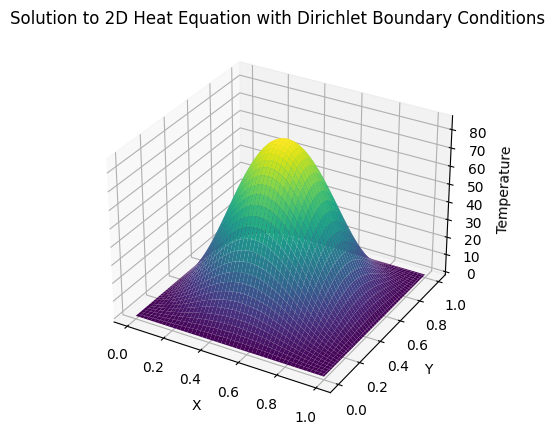

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def solve_heat_equation_2d(L=1.0, T=1.0, Nx=100, Ny=100, Nt=1000, alpha=0.01):
    """
    Solve the two-dimensional heat equation with Dirichlet boundary conditions using finite difference method.

    Parameters:
    - L (float): Length of the domain.
    - T (float): Total simulation time.
    - Nx (int): Number of grid points in x-direction.
    - Ny (int): Number of grid points in y-direction.
    - Nt (int): Number of time steps.
    - alpha (float): Thermal diffusivity.

    Returns:
    - None: Plots the temperature distribution over the domain.
    """
    dx = L / (Nx - 1)
    dy = L / (Ny - 1)
    dt = T / Nt

    # Initial conditions
    u = np.zeros((Nx, Ny))
    u[int(0.25 * Nx):int(0.75 * Nx), int(0.25 * Ny):int(0.75 * Ny)] = 100.0

    # Boundary conditions
    u[0, :] = 0.0     # Left boundary
    u[Nx-1, :] = 0.0  # Right boundary
    u[:, 0] = 0.0     # Bottom boundary
    u[:, Ny-1] = 0.0  # Top boundary

    # Finite difference method
    for n in range(Nt):
        un = u.copy()
        u[1:-1, 1:-1] = un[1:-1, 1:-1] + alpha * dt * (
            (un[2:, 1:-1] - 2 * un[1:-1, 1:-1] + un[:-2, 1:-1]) / dx**2 +
            (un[1:-1, 2:] - 2 * un[1:-1, 1:-1] + un[1:-1, :-2]) / dy**2)

    # Plotting
    X, Y = np.meshgrid(np.linspace(0, L, Nx), np.linspace(0, L, Ny))
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, u, cmap='viridis')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Temperature')
    plt.title('Solution to 2D Heat Equation with Dirichlet Boundary Conditions')
    plt.show()

# Example usage
solve_heat_equation_2d()


### REFERENCES

1. [Solving 2D Heat Equation Numerically Using Python](https://levelup.gitconnected.com/solving-2d-heat-equation-numerically-using-python-3334004aa01a) - Provides a detailed guide on solving the 2D heat equation numerically using Python, offering insights into the implementation process.

2. [Beginner's Introduction to Natural Simulation in Python I: Solving the Heat Equation](https://medium.com/@matiasortizdiez/beginners-introduction-to-natural-simulation-in-python-i-solving-the-heat-equation-bf0ae5d4c37f) - Offers an introductory overview of natural simulation in Python, focusing on solving the heat equation, suitable for beginners.

3. *Numerical Python: Scientific Computing and Data Science Applications with NumPy, SciPy, and Matplotlib* — Second Edition — Robert Johansson - This book serves as a comprehensive resource for scientific computing and data science applications in Python, providing in-depth coverage of NumPy, SciPy, and Matplotlib.
